# DATA PREPROCESSING

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# Import datasets

In [2]:
schedule_data = pd.read_csv("C:\\Users\\moneesh.basker\\Downloads\\Regression Assignment\\Regression Assignment\\Schedule Data.csv")
schedule_data.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,09-12-2013 14:15,09-12-2013 16:15,0,1,0,120,Daytime,60064,388053.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0


In [3]:
meta_data = pd.read_csv("C:\\Users\\moneesh.basker\\Downloads\\Regression Assignment\\Regression Assignment\\ASSET_METADATA.csv")
meta_data.head()

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE,BOX_OFFICE_EARNINGS
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,33.0,4.8,55.0,18.0,37.0,36.0,3.0,14994.0,rotten,"$94,700,000"
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,3.0,2.6,117.0,4.0,113.0,14.0,2.1,36746.0,rotten,"$18,900,000"
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,2.0,2.3,64.0,1.0,63.0,29.0,2.4,560170.0,rotten,"$39,700,000"
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,75.0,6.7,187.0,141.0,46.0,76.0,3.6,570016.0,certified,"$124,700,000"
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,14.0,3.8,124.0,17.0,107.0,38.0,2.8,376512.0,rotten,"$30,100,000"


# Merging Datasets

In [4]:
df = pd.merge(schedule_data, meta_data,how='left',on='ASSET_ID')

In [5]:
df.shape

(2517, 30)

# Missing & Duplicate data

In [6]:
df.isna().sum()

ASSET_ID                     0
AIRING_START_DATE_TIME       0
AIRING_END_DATE_TIME         0
PREMIER_AIRING               0
EXHIBITION_AIRING            0
FREE_AIRING                  0
SCHEDULED_RUNTIME            0
DAY_PART                     0
AIRING_REVENUE               0
C3_RATING                    8
RELEASE_YEAR                 0
MPAA_RATING                 30
GENRE                        0
IMDB_RATING                  0
IMDB_RANKING               577
IMDB_VOTES                   0
Oscar-Nomination             0
Oscar-Wins                   0
Other - Nominations          0
Other - Wins                 0
TOMATO_METER               161
TOMATO_RATING              161
TOMATO_REVIEWS             161
TOMATO_FRESH               161
TOMATO_ROTTEN              161
TOMATO_USER_METER           79
TOMATO_USER_RATINGS         50
TOMATO_USER_REVIEWS         50
TOMATO_IMAGE               161
BOX_OFFICE_EARNINGS       1479
dtype: int64

In [7]:
df.duplicated().sum()

0

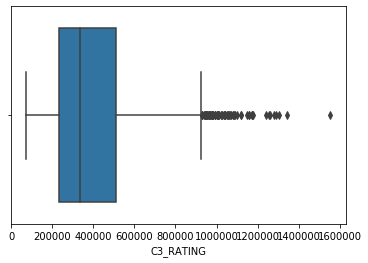

In [8]:
sns.boxplot(x=df['C3_RATING'])

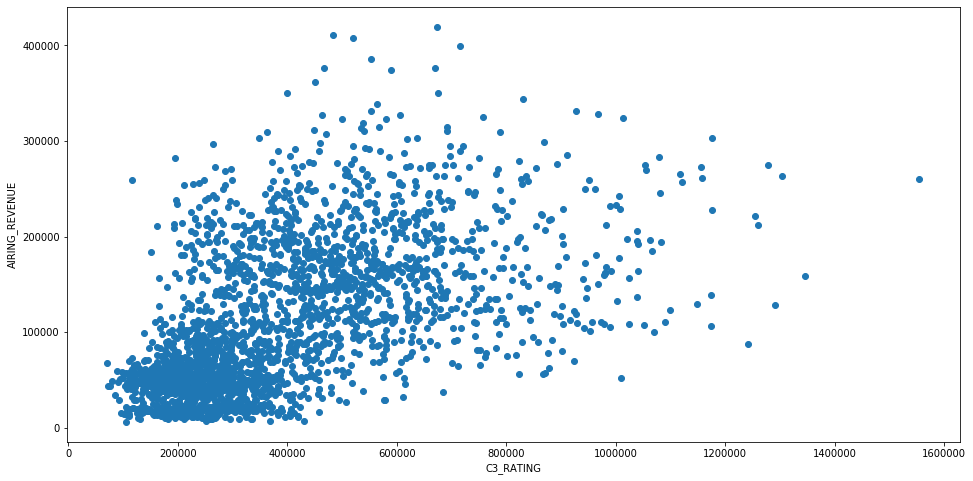

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['C3_RATING'], df['AIRING_REVENUE'])
ax.set_xlabel('C3_RATING')
ax.set_ylabel('AIRING_REVENUE')
plt.show()

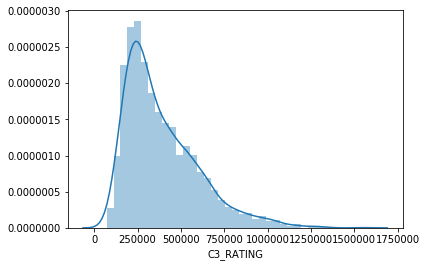

In [10]:
sns.distplot(df['C3_RATING'])
plt.show()

In [11]:
df.C3_RATING.describe()

count    2.509000e+03
mean     3.905997e+05
std      2.127546e+05
min      7.152900e+04
25%      2.315390e+05
50%      3.329190e+05
75%      5.091160e+05
max      1.553844e+06
Name: C3_RATING, dtype: float64

In [12]:
def remove_outliers(col,min_perc,max_perc):
    min_thresh, max_thresh = col.quantile([min_perc,max_perc])
    for x in range(len(col)):
        if col[x] < min_thresh:
            col[x]=min_thresh
        elif col[x]> max_thresh:
            col[x]=max_thresh
    print(sns.boxplot(x=col))
    

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


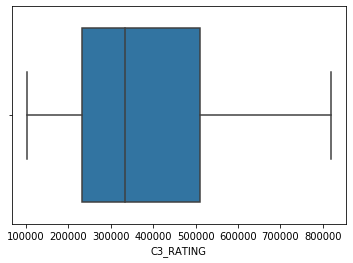

In [13]:
remove_outliers(df.C3_RATING,0.005,0.95)

In [14]:
df.MPAA_RATING.unique()

array(['PG-13', 'R', 'PG', nan, 'APPROVED', 'G', 'NOT RATED', 'UNRATED',
       'X', 'M', 'GP'], dtype=object)

In [15]:
df.MPAA_RATING.value_counts()

R            1131
PG-13         905
PG            343
G              41
APPROVED       30
NOT RATED      15
X              13
UNRATED         5
M               3
GP              1
Name: MPAA_RATING, dtype: int64

In [16]:
df.TOMATO_IMAGE.value_counts()

rotten       1142
certified     725
fresh         489
Name: TOMATO_IMAGE, dtype: int64

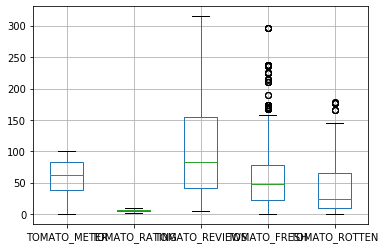

In [17]:
df.boxplot(column=["TOMATO_METER", "TOMATO_RATING","TOMATO_REVIEWS","TOMATO_FRESH","TOMATO_ROTTEN"])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


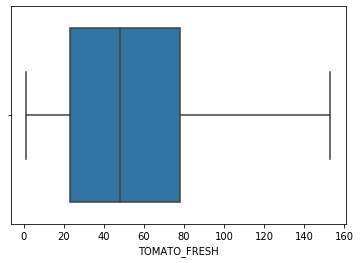

In [18]:
remove_outliers(df.TOMATO_FRESH,0.005,0.95)

C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


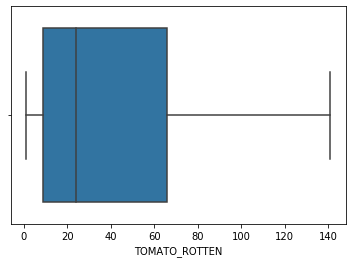

In [19]:
remove_outliers(df.TOMATO_ROTTEN,0.005,0.99)

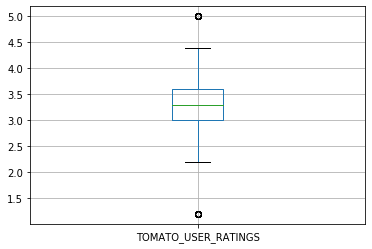

In [20]:
df.boxplot(column=["TOMATO_USER_RATINGS"])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


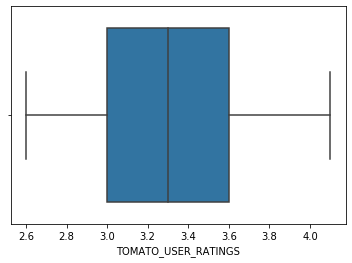

In [21]:
remove_outliers(df.TOMATO_USER_RATINGS,0.05,0.95)

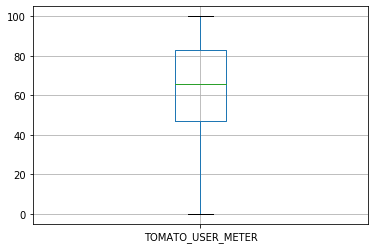

In [22]:
df.boxplot(column=["TOMATO_USER_METER"])

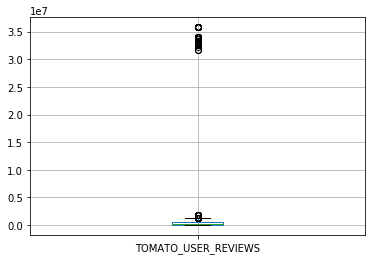

In [23]:
df.boxplot(column=["TOMATO_USER_REVIEWS"])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


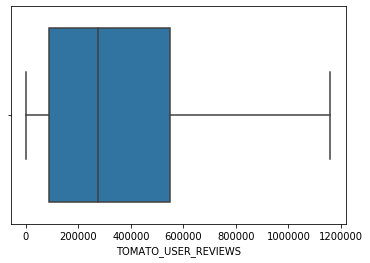

In [24]:
remove_outliers(df.TOMATO_USER_REVIEWS,0.005,0.937)

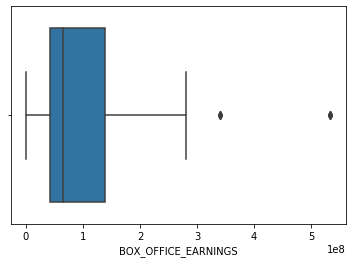

In [25]:
df.loc[df['BOX_OFFICE_EARNINGS'].notna(),'BOX_OFFICE_EARNINGS'] = df.loc[df['BOX_OFFICE_EARNINGS'].notna(),'BOX_OFFICE_EARNINGS'].str.replace(',', '').str.replace('$', '').astype(int)
df["BOX_OFFICE_EARNINGS"] = pd.to_numeric(df["BOX_OFFICE_EARNINGS"])
sns.boxplot(x=df['BOX_OFFICE_EARNINGS'])

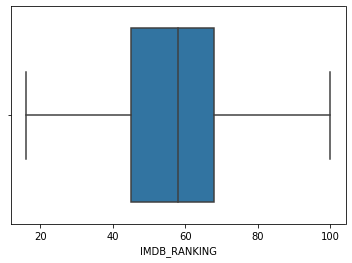

In [26]:
sns.boxplot(x=df['IMDB_RANKING'])

In [27]:
#Handling Missing Data

df['C3_RATING'] = df['C3_RATING'].fillna(df['C3_RATING'].median())
df['MPAA_RATING'] = df['MPAA_RATING'].fillna('NOT RATED')
df['TOMATO_IMAGE'] = df['TOMATO_IMAGE'].fillna(df['TOMATO_IMAGE'].mode()[0])
df['TOMATO_METER'] = df['TOMATO_METER'].fillna(df['TOMATO_METER'].mean())
df['TOMATO_RATING'] = df['TOMATO_RATING'].fillna(df['TOMATO_RATING'].mean())
df['TOMATO_FRESH'] = df['TOMATO_FRESH'].fillna(df['TOMATO_FRESH'].median())
df['TOMATO_ROTTEN'] = df['TOMATO_ROTTEN'].fillna(df['TOMATO_ROTTEN'].median())
df['TOMATO_REVIEWS'] = df['TOMATO_REVIEWS'].fillna(df['TOMATO_REVIEWS'].mean())
df['TOMATO_USER_METER'] = df['TOMATO_USER_METER'].fillna(df['TOMATO_USER_METER'].mean())
df['TOMATO_USER_RATINGS'] = df['TOMATO_USER_RATINGS'].fillna(df['TOMATO_USER_RATINGS'].mean())
df['TOMATO_USER_REVIEWS'] = df['TOMATO_USER_REVIEWS'].fillna(df['TOMATO_USER_REVIEWS'].median())
df['BOX_OFFICE_EARNINGS'] = df['BOX_OFFICE_EARNINGS'].fillna(df['BOX_OFFICE_EARNINGS'].mean())
df['IMDB_RANKING'] = df['IMDB_RANKING'].fillna(df['IMDB_RANKING'].mean())

In [28]:
df.isna().sum()

ASSET_ID                  0
AIRING_START_DATE_TIME    0
AIRING_END_DATE_TIME      0
PREMIER_AIRING            0
EXHIBITION_AIRING         0
FREE_AIRING               0
SCHEDULED_RUNTIME         0
DAY_PART                  0
AIRING_REVENUE            0
C3_RATING                 0
RELEASE_YEAR              0
MPAA_RATING               0
GENRE                     0
IMDB_RATING               0
IMDB_RANKING              0
IMDB_VOTES                0
Oscar-Nomination          0
Oscar-Wins                0
Other - Nominations       0
Other - Wins              0
TOMATO_METER              0
TOMATO_RATING             0
TOMATO_REVIEWS            0
TOMATO_FRESH              0
TOMATO_ROTTEN             0
TOMATO_USER_METER         0
TOMATO_USER_RATINGS       0
TOMATO_USER_REVIEWS       0
TOMATO_IMAGE              0
BOX_OFFICE_EARNINGS       0
dtype: int64

# Handling Datatypes

In [29]:
df.dtypes

ASSET_ID                    int64
AIRING_START_DATE_TIME     object
AIRING_END_DATE_TIME       object
PREMIER_AIRING              int64
EXHIBITION_AIRING           int64
FREE_AIRING                 int64
SCHEDULED_RUNTIME           int64
DAY_PART                   object
AIRING_REVENUE              int64
C3_RATING                 float64
RELEASE_YEAR              float64
MPAA_RATING                object
GENRE                      object
IMDB_RATING               float64
IMDB_RANKING              float64
IMDB_VOTES                 object
Oscar-Nomination            int64
Oscar-Wins                  int64
Other - Nominations         int64
Other - Wins                int64
TOMATO_METER              float64
TOMATO_RATING             float64
TOMATO_REVIEWS            float64
TOMATO_FRESH              float64
TOMATO_ROTTEN             float64
TOMATO_USER_METER         float64
TOMATO_USER_RATINGS       float64
TOMATO_USER_REVIEWS       float64
TOMATO_IMAGE               object
BOX_OFFICE_EAR

In [30]:
df["RELEASE_YEAR"]= pd.to_datetime(df.RELEASE_YEAR, format='%Y')
df["IMDB_VOTES"] = df["IMDB_VOTES"].str.replace(',', '')
df["IMDB_VOTES"] = pd.to_numeric(df["IMDB_VOTES"])
df["AIRING_DATE"] = pd.to_datetime(df.AIRING_START_DATE_TIME).dt.date
df['AIRING_DAY'] = pd.to_datetime(df.AIRING_START_DATE_TIME).dt.day_name()
df['AIRING_MONTH'] = pd.to_datetime(df.AIRING_START_DATE_TIME).dt.strftime("%B")
df['AIRING_HOUR'] = pd.to_datetime(df.AIRING_START_DATE_TIME).dt.hour
df.drop(['AIRING_START_DATE_TIME','AIRING_END_DATE_TIME'],axis=1,inplace=True)

# Plots to understand the data

In [31]:
df.dtypes

ASSET_ID                        int64
PREMIER_AIRING                  int64
EXHIBITION_AIRING               int64
FREE_AIRING                     int64
SCHEDULED_RUNTIME               int64
DAY_PART                       object
AIRING_REVENUE                  int64
C3_RATING                     float64
RELEASE_YEAR           datetime64[ns]
MPAA_RATING                    object
GENRE                          object
IMDB_RATING                   float64
IMDB_RANKING                  float64
IMDB_VOTES                      int64
Oscar-Nomination                int64
Oscar-Wins                      int64
Other - Nominations             int64
Other - Wins                    int64
TOMATO_METER                  float64
TOMATO_RATING                 float64
TOMATO_REVIEWS                float64
TOMATO_FRESH                  float64
TOMATO_ROTTEN                 float64
TOMATO_USER_METER             float64
TOMATO_USER_RATINGS           float64
TOMATO_USER_REVIEWS           float64
TOMATO_IMAGE

In [32]:
df["AIRING_DATE"] = pd.to_datetime(df.AIRING_DATE)
df.dtypes

ASSET_ID                        int64
PREMIER_AIRING                  int64
EXHIBITION_AIRING               int64
FREE_AIRING                     int64
SCHEDULED_RUNTIME               int64
DAY_PART                       object
AIRING_REVENUE                  int64
C3_RATING                     float64
RELEASE_YEAR           datetime64[ns]
MPAA_RATING                    object
GENRE                          object
IMDB_RATING                   float64
IMDB_RANKING                  float64
IMDB_VOTES                      int64
Oscar-Nomination                int64
Oscar-Wins                      int64
Other - Nominations             int64
Other - Wins                    int64
TOMATO_METER                  float64
TOMATO_RATING                 float64
TOMATO_REVIEWS                float64
TOMATO_FRESH                  float64
TOMATO_ROTTEN                 float64
TOMATO_USER_METER             float64
TOMATO_USER_RATINGS           float64
TOMATO_USER_REVIEWS           float64
TOMATO_IMAGE

In [33]:
df.describe()

,ASSET_ID,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,AIRING_REVENUE,C3_RATING,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,...,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,BOX_OFFICE_EARNINGS,AIRING_HOUR
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2.517000e+03,2517.000000
mean,180691.980930,0.047279,0.644815,0.355185,156.087008,109718.529201,382898.117545,6.717163,57.262887,2.021882e+05,...,59.080645,6.016553,100.300085,56.081049,40.194676,64.145611,3.315039,3.790229e+05,9.639287e+07,12.566547
std,7700.604081,0.212276,0.478664,0.478664,31.011178,76986.271651,191041.420842,1.099400,14.014839,2.671626e+05,...,25.507244,1.417912,63.647963,40.938472,37.777393,21.428675,0.411960,3.503996e+05,5.008613e+07,6.730330
min,171646.000000,0.000000,0.000000,0.000000,90.000000,6095.000000,101834.820000,2.400000,16.000000,9.000000e+00,...,0.000000,2.000000,5.000000,1.000000,1.000000,0.000000,2.600000,3.000000e+01,3.000000e+05,0.000000
25%,173350.000000,0.000000,0.000000,0.000000,135.000000,47868.000000,231621.000000,6.000000,48.000000,4.894500e+04,...,39.000000,5.000000,43.000000,24.000000,10.000000,48.000000,3.000000,8.701900e+04,8.960000e+07,9.000000
50%,181163.000000,0.000000,1.000000,0.000000,150.000000,88952.000000,332919.000000,6.600000,57.262887,1.016100e+05,...,59.080645,6.016553,85.000000,48.000000,24.000000,64.145611,3.300000,2.730060e+05,9.639287e+07,13.000000
75%,185529.000000,0.000000,1.000000,1.000000,180.000000,164907.000000,508195.000000,7.400000,65.000000,2.353410e+05,...,82.000000,7.000000,149.000000,75.000000,63.000000,83.000000,3.600000,5.339780e+05,9.639287e+07,18.000000
max,202224.000000,1.000000,1.000000,1.000000,300.000000,419424.000000,819456.200000,9.300000,100.000000,1.501907e+06,...,100.000000,9.500000,315.000000,153.000000,141.000000,100.000000,4.100000,1.159127e+06,5.333000e+08,23.000000


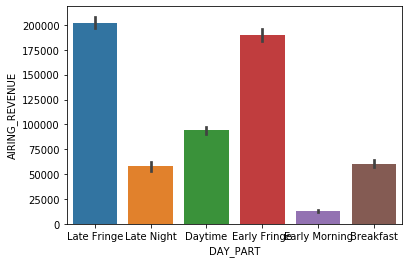

In [34]:
sns.barplot(x='DAY_PART',y='AIRING_REVENUE',data=df)
#obvious categories that produce more revenue are Late Fringe and Early Fringe the time of streaming does effect revenue

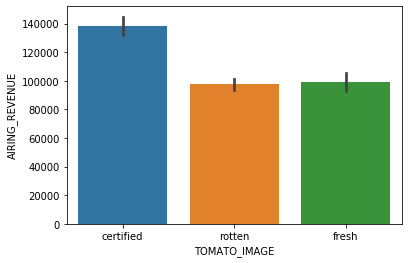

In [35]:
sns.barplot(x='TOMATO_IMAGE',y='AIRING_REVENUE',data = df)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

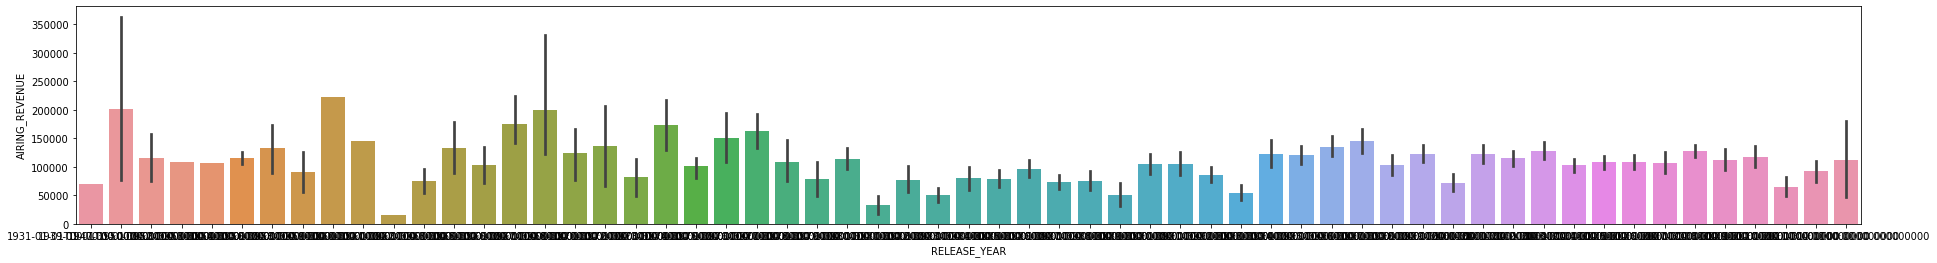

In [36]:
plt.figure(figsize = (32,4))
sns.barplot(x='RELEASE_YEAR',y='AIRING_REVENUE',data = df)
plt.tight_layout

In [37]:
df['RELEASE_YEAR'].describe()

count                    2517
unique                     59
top       2006-01-01 00:00:00
freq                      191
first     1931-01-01 00:00:00
last      2011-01-01 00:00:00
Name: RELEASE_YEAR, dtype: object

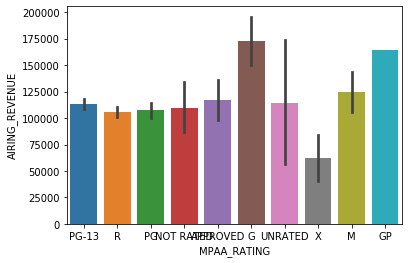

In [38]:
sns.barplot(x='MPAA_RATING',y='AIRING_REVENUE',data = df)

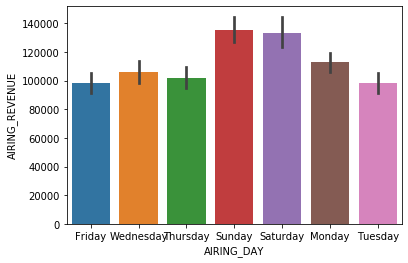

In [39]:
sns.barplot(x='AIRING_DAY',y='AIRING_REVENUE',data = df)

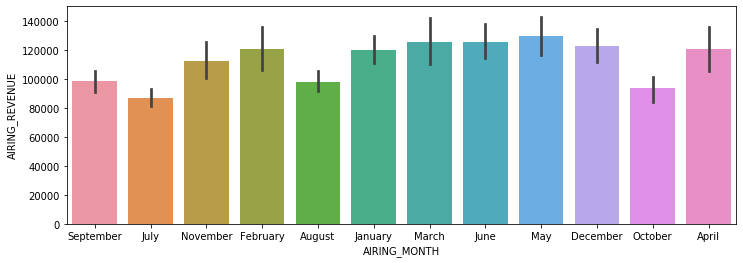

In [40]:
plt.figure(figsize = (12,4))
sns.barplot(x='AIRING_MONTH',y='AIRING_REVENUE',data = df)

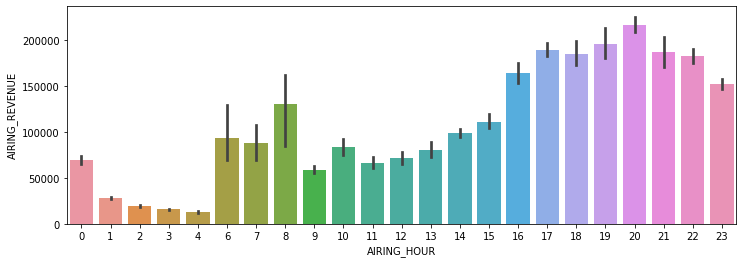

In [41]:
plt.figure(figsize = (12,4))
sns.barplot(x='AIRING_HOUR',y='AIRING_REVENUE',data = df)

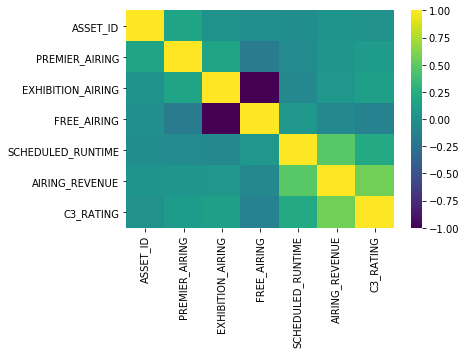

In [42]:
sns.heatmap(schedule_data.corr(),cmap = 'viridis')
#free_airing and exhibition airing exibhits neg correlation

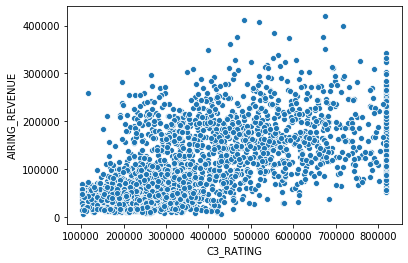

In [43]:
sns.scatterplot(x='C3_RATING',y='AIRING_REVENUE',data=df)

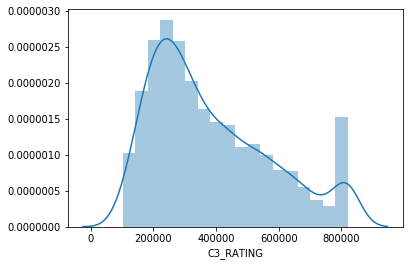

In [44]:
sns.distplot(df['C3_RATING'])

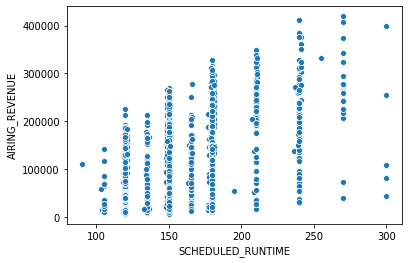

In [45]:
sns.scatterplot(x='SCHEDULED_RUNTIME',y='AIRING_REVENUE',data=df)

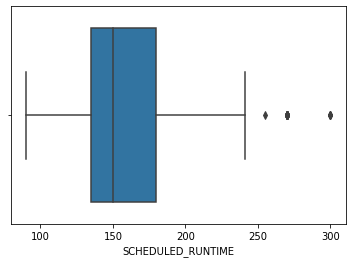

In [46]:
sns.boxplot(x=df['SCHEDULED_RUNTIME'])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


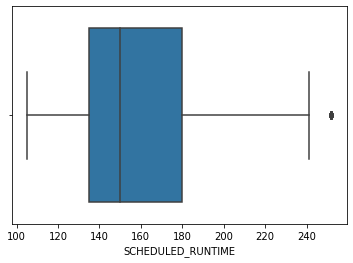

In [47]:
remove_outliers(df.SCHEDULED_RUNTIME,0.005,0.99)

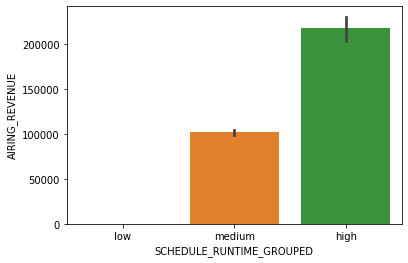

In [48]:
bins = pd.Series(np.linspace(0, 300, 4))
labels = ['low','medium','high']
df['SCHEDULE_RUNTIME_GROUPED'] = pd.cut(df['SCHEDULED_RUNTIME'],bins, labels =labels)
sns.barplot(x='SCHEDULE_RUNTIME_GROUPED',y='AIRING_REVENUE',data = df)

In [49]:
df.drop('SCHEDULE_RUNTIME_GROUPED', inplace = True, axis=1)

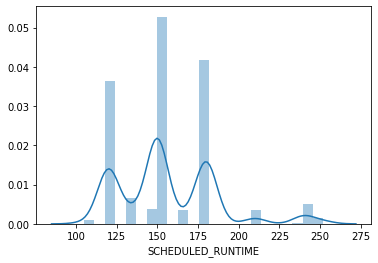

In [50]:
sns.distplot(df['SCHEDULED_RUNTIME'])

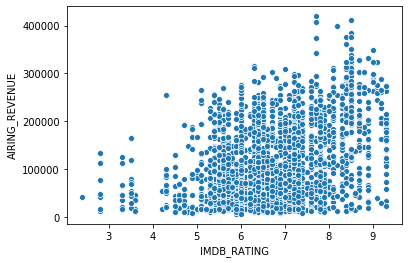

In [51]:
sns.scatterplot(x='IMDB_RATING',y='AIRING_REVENUE',data=df)

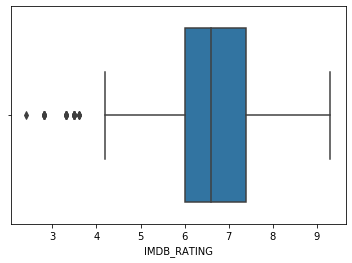

In [52]:
sns.boxplot(x=df['IMDB_RATING'])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


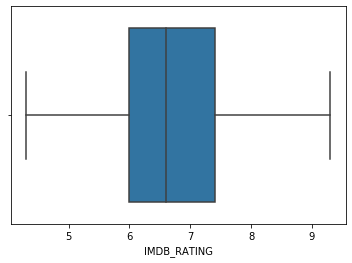

In [53]:
remove_outliers(df.IMDB_RATING,0.018,0.999)

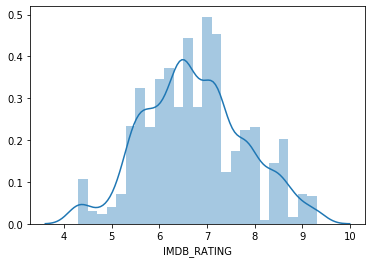

In [54]:
sns.distplot(df['IMDB_RATING'])

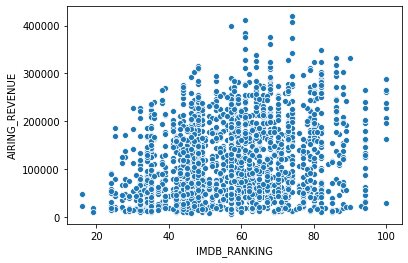

In [55]:
sns.scatterplot(x='IMDB_RANKING',y='AIRING_REVENUE',data=df)

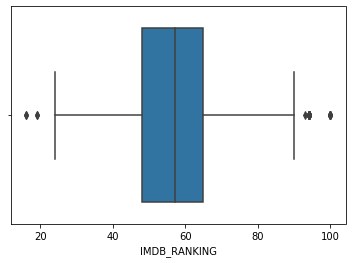

In [56]:
sns.boxplot(x=df['IMDB_RANKING'])

C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


AxesSubplot(0.125,0.125;0.775x0.755)


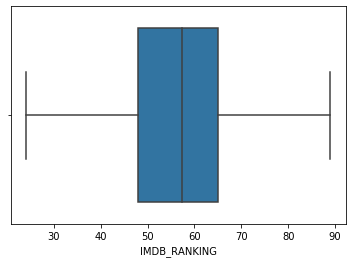

In [57]:
remove_outliers(df.IMDB_RANKING,0.005,0.985)

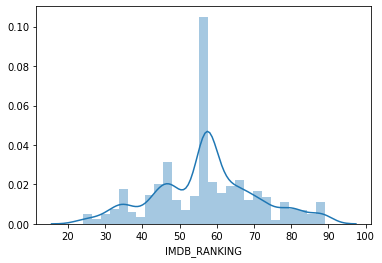

In [58]:
sns.distplot(df['IMDB_RANKING'])

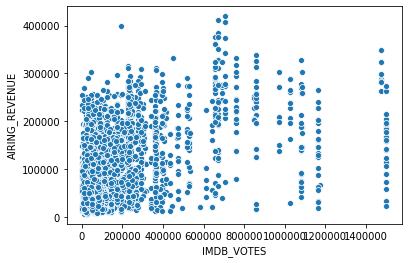

In [59]:
sns.scatterplot(x='IMDB_VOTES',y='AIRING_REVENUE',data=df)

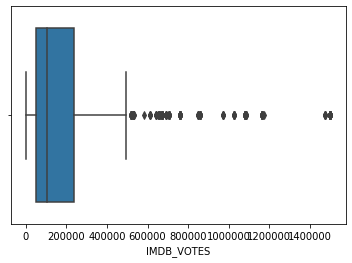

In [60]:
sns.boxplot(x=df['IMDB_VOTES'])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


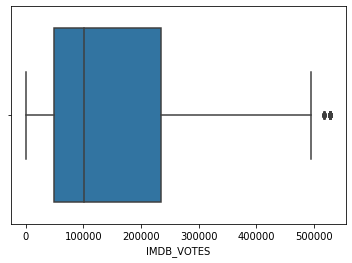

In [61]:
remove_outliers(df.IMDB_VOTES,0.0005,0.91)

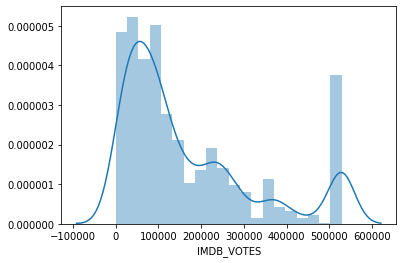

In [62]:
sns.distplot(df['IMDB_VOTES'])

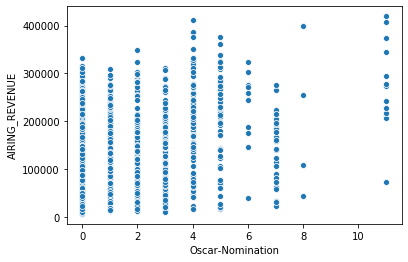

In [63]:
sns.scatterplot(x='Oscar-Nomination',y='AIRING_REVENUE',data=df)

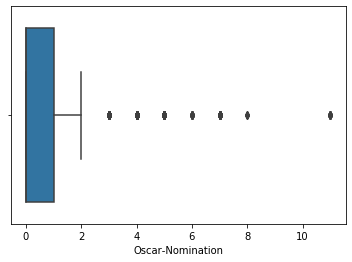

In [64]:
sns.boxplot(x=df['Oscar-Nomination'])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


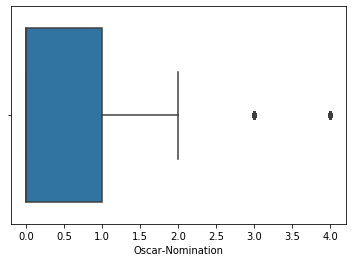

In [65]:
remove_outliers(df['Oscar-Nomination'],0.005,0.95)

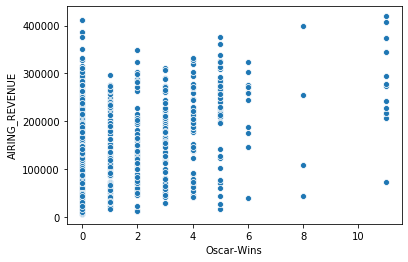

In [66]:
sns.scatterplot(x='Oscar-Wins',y='AIRING_REVENUE',data=df)

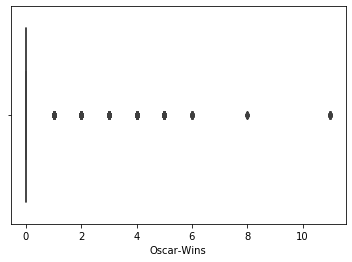

In [67]:
sns.boxplot(x=df['Oscar-Wins'])

AxesSubplot(0.125,0.125;0.775x0.755)


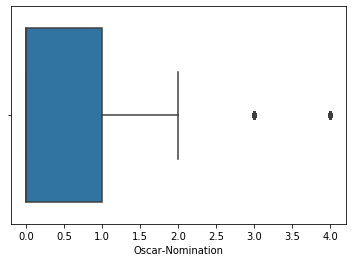

In [68]:
remove_outliers(df['Oscar-Nomination'],0.005,0.95)

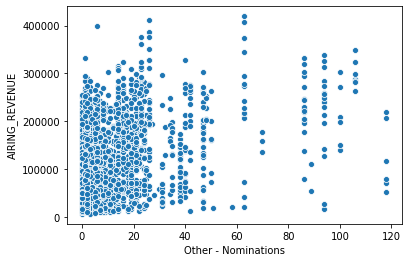

In [69]:
sns.scatterplot(x='Other - Nominations',y='AIRING_REVENUE',data=df)

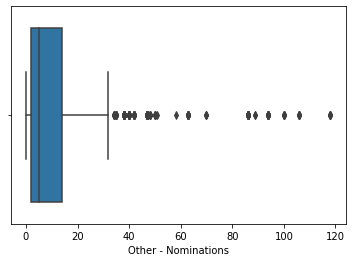

In [70]:
sns.boxplot(x=df['Other - Nominations'])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


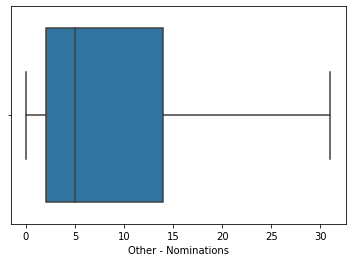

In [71]:
remove_outliers(df['Other - Nominations'],0.005,0.92)

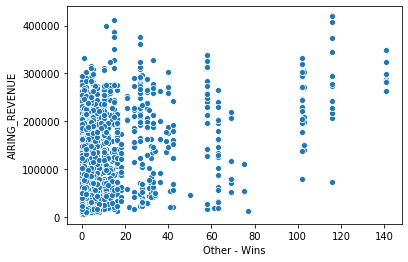

In [72]:
sns.scatterplot(x='Other - Wins',y='AIRING_REVENUE',data=df)

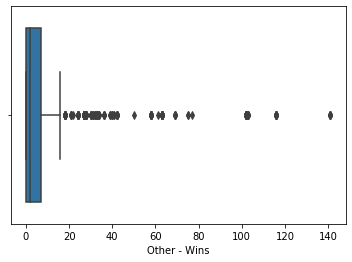

In [73]:
sns.boxplot(x=df['Other - Wins'])

C:\Users\moneesh.basker\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


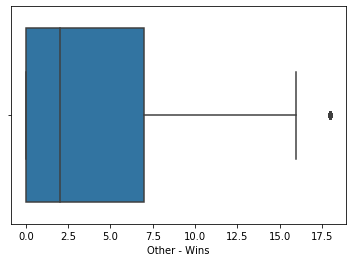

In [74]:
remove_outliers(df['Other - Wins'],0.005,0.9)

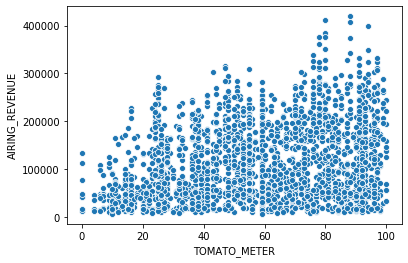

In [75]:
sns.scatterplot(x='TOMATO_METER',y='AIRING_REVENUE',data=df)

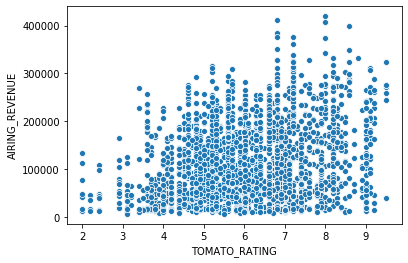

In [76]:
sns.scatterplot(x='TOMATO_RATING',y='AIRING_REVENUE',data=df)

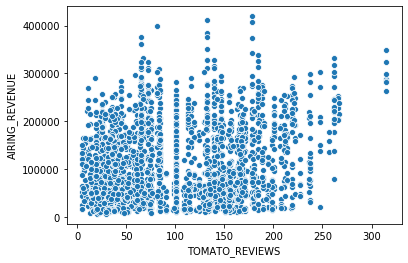

In [77]:
sns.scatterplot(x='TOMATO_REVIEWS',y='AIRING_REVENUE',data=df)

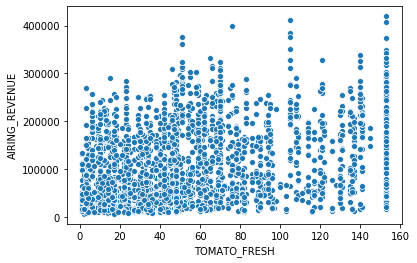

In [78]:
sns.scatterplot(x='TOMATO_FRESH',y='AIRING_REVENUE',data=df)

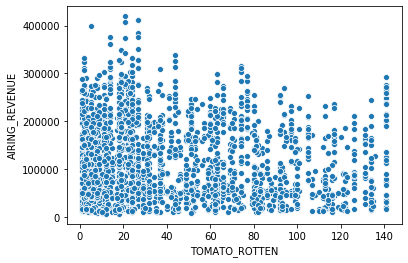

In [79]:
sns.scatterplot(x='TOMATO_ROTTEN',y='AIRING_REVENUE',data=df)

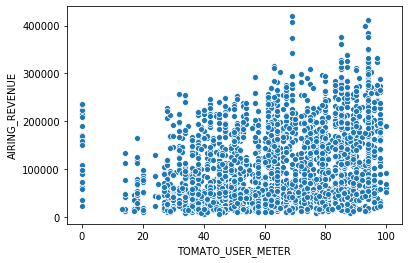

In [80]:
sns.scatterplot(x='TOMATO_USER_METER',y='AIRING_REVENUE',data=df)

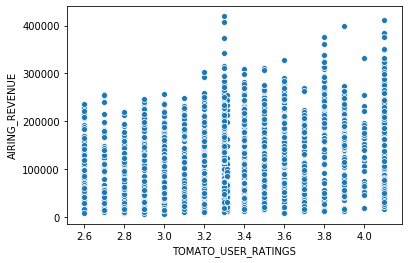

In [81]:
sns.scatterplot(x='TOMATO_USER_RATINGS',y='AIRING_REVENUE',data=df)

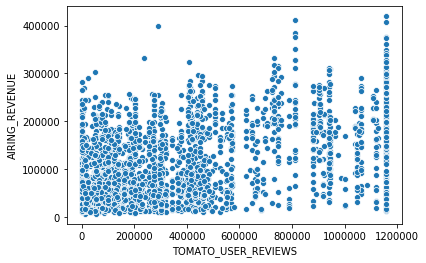

In [82]:
sns.scatterplot(x='TOMATO_USER_REVIEWS',y='AIRING_REVENUE',data=df)

In [83]:
df_corr = df.corr().AIRING_REVENUE
df_corr.drop(['AIRING_REVENUE'],axis=0,inplace=True)
df_corr.sort_values(ascending=False)

AIRING_HOUR            0.738014
C3_RATING              0.587540
SCHEDULED_RUNTIME      0.483730
IMDB_VOTES             0.471783
TOMATO_USER_REVIEWS    0.423818
Other - Nominations    0.375126
Other - Wins           0.357771
Oscar-Nomination       0.350626
IMDB_RATING            0.346805
TOMATO_USER_RATINGS    0.342818
Oscar-Wins             0.341576
TOMATO_FRESH           0.315405
TOMATO_USER_METER      0.286113
TOMATO_RATING          0.269453
BOX_OFFICE_EARNINGS    0.257002
TOMATO_METER           0.233335
IMDB_RANKING           0.224394
TOMATO_REVIEWS         0.210519
EXHIBITION_AIRING      0.059522
PREMIER_AIRING         0.051338
ASSET_ID               0.035577
TOMATO_ROTTEN         -0.053638
FREE_AIRING           -0.059522
Name: AIRING_REVENUE, dtype: float64

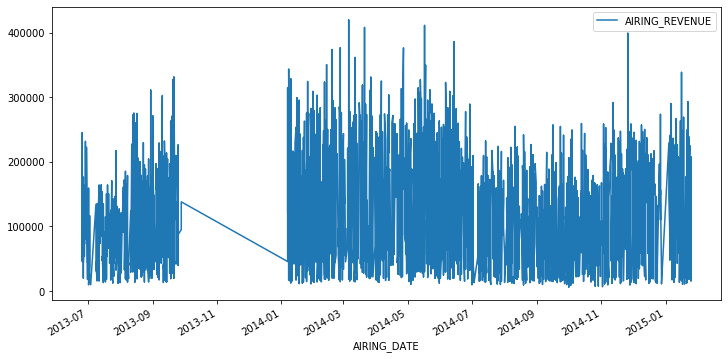

In [84]:
df.plot(x='AIRING_DATE', y='AIRING_REVENUE', figsize=(12,6))

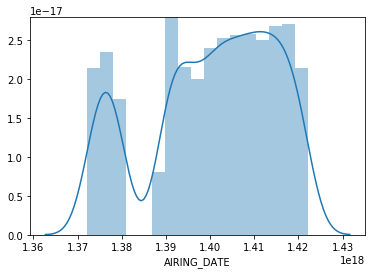

In [85]:
sns.distplot(df['AIRING_DATE'])

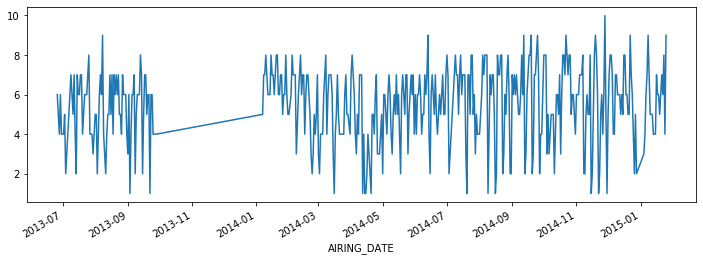

In [86]:
plt.figure(figsize = (12,4))
df.groupby('AIRING_DATE')['ASSET_ID'].count().plot()

In [87]:
df.groupby('DAY_PART')['AIRING_REVENUE'].mean()

DAY_PART
Breakfast         60369.755396
Daytime           93908.028108
Early Fringe     189984.573171
Early Morning     13298.297297
Late Fringe      202466.419525
Late Night        57845.736842
Name: AIRING_REVENUE, dtype: float64

In [88]:
df.groupby('AIRING_DAY')['AIRING_REVENUE'].mean()

AIRING_DAY
Friday        98082.570743
Monday       112819.403955
Saturday     133309.705882
Sunday       135649.165975
Thursday     102226.385366
Tuesday       98604.349367
Wednesday    106331.336449
Name: AIRING_REVENUE, dtype: float64

# Handling Categorical variables

In [89]:
genre = df['GENRE'].to_list()
split_genre = [re.split(', ',item) for item in genre]
ug = list(set(x for item in split_genre for x in item))
ug.sort()
ug

['Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [90]:
gen_encode = np.zeros((df.shape[0],len(ug)))
for x in range(df.shape[0]):
    for y in range(len(ug)):
        if ug[y] in split_genre[x]:
            gen_encode[x][y]=1
gen_encode = pd.DataFrame(gen_encode,columns = ug)
gen_encode

,Action,Adventure,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2513,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df = pd.concat([df,gen_encode], axis=1)
del df['GENRE']

In [92]:
df

,ASSET_ID,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,RELEASE_YEAR,MPAA_RATING,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,174543,0,1,0,150,Late Fringe,197840,595443.0,2000-01-01,PG-13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,181758,0,0,1,180,Late Night,89818,216841.0,1999-01-01,R,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,191074,0,1,0,120,Daytime,60064,388053.0,1990-01-01,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,196156,1,1,0,180,Early Fringe,164494,670869.0,2006-01-01,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,174201,0,0,1,120,Daytime,86961,311122.0,1993-01-01,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,185554,0,1,0,150,Late Night,23021,336985.0,2005-01-01,PG-13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2513,171859,0,1,0,150,Breakfast,50155,184164.0,1995-01-01,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2514,171986,0,1,0,150,Daytime,86038,461515.0,1984-01-01,PG,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515,185461,0,0,1,135,Daytime,43436,206781.0,1999-01-01,PG,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
cat_cols = ["ASSET_ID","DAY_PART","RELEASE_YEAR","MPAA_RATING","TOMATO_IMAGE","AIRING_DAY","AIRING_MONTH","AIRING_HOUR","AIRING_DATE"]
df1 = pd.get_dummies(df, columns=cat_cols,drop_first=True)

In [94]:
df1.head()

,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,AIRING_REVENUE,C3_RATING,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,...,AIRING_DATE_2015-01-16 00:00:00,AIRING_DATE_2015-01-17 00:00:00,AIRING_DATE_2015-01-18 00:00:00,AIRING_DATE_2015-01-19 00:00:00,AIRING_DATE_2015-01-20 00:00:00,AIRING_DATE_2015-01-21 00:00:00,AIRING_DATE_2015-01-22 00:00:00,AIRING_DATE_2015-01-23 00:00:00,AIRING_DATE_2015-01-24 00:00:00,AIRING_DATE_2015-01-25 00:00:00
0,0,1,0,150,197840,595443.0,7.8,69.000000,205473,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,180,89818,216841.0,8.7,73.000000,528999,4,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,120,60064,388053.0,5.7,57.262887,19896,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,180,164494,670869.0,8.0,81.000000,407119,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,120,86961,311122.0,6.4,60.000000,87972,3,...,0,0,0,0,0,0,0,0,0,0


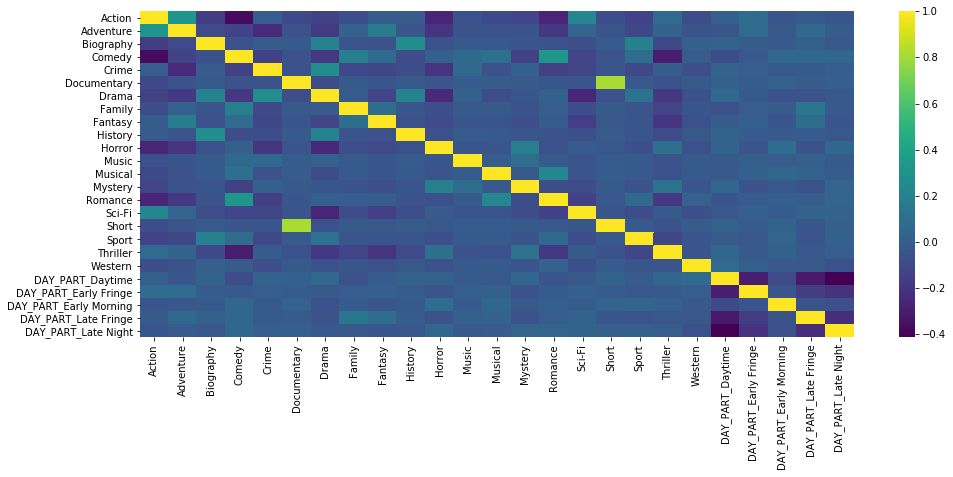

In [95]:
c = df1[['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller',
       'Western','DAY_PART_Daytime','DAY_PART_Early Fringe','DAY_PART_Early Morning','DAY_PART_Late Fringe','DAY_PART_Late Night']]
plt.figure(figsize=(16,6))
#sns.heatmap(c.corr(),cmap='viridis',annot=True)
sns.heatmap(c.corr(),cmap='viridis',annot=False)

In [96]:
df2=df.drop(['ASSET_ID','DAY_PART','RELEASE_YEAR','MPAA_RATING','TOMATO_IMAGE','Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western','AIRING_REVENUE',"AIRING_DAY","AIRING_MONTH","AIRING_HOUR","AIRING_DATE"],axis=1)

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PREMIER_AIRING       2517 non-null   int64  
 1   EXHIBITION_AIRING    2517 non-null   int64  
 2   FREE_AIRING          2517 non-null   int64  
 3   SCHEDULED_RUNTIME    2517 non-null   int64  
 4   C3_RATING            2517 non-null   float64
 5   IMDB_RATING          2517 non-null   float64
 6   IMDB_RANKING         2517 non-null   float64
 7   IMDB_VOTES           2517 non-null   int64  
 8   Oscar-Nomination     2517 non-null   int64  
 9   Oscar-Wins           2517 non-null   int64  
 10  Other - Nominations  2517 non-null   int64  
 11  Other - Wins         2517 non-null   int64  
 12  TOMATO_METER         2517 non-null   float64
 13  TOMATO_RATING        2517 non-null   float64
 14  TOMATO_REVIEWS       2517 non-null   float64
 15  TOMATO_FRESH         2517 non-null   f

In [98]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_inf = pd.DataFrame()
vif_inf['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
vif_inf['Column'] = df2.columns
vif_inf.sort_values('VIF',ascending=False)

,VIF,Column
1,264.027637,EXHIBITION_AIRING
2,145.155740,FREE_AIRING
14,30.589959,TOMATO_REVIEWS
12,23.063264,TOMATO_METER
13,21.542965,TOMATO_RATING
15,19.180988,TOMATO_FRESH
16,13.474003,TOMATO_ROTTEN
17,9.770157,TOMATO_USER_METER
5,8.571904,IMDB_RATING
7,8.116075,IMDB_VOTES


In [99]:
df2.shape[1]

21

In [100]:
vif_inf = vif_inf[vif_inf['VIF']<=10].Column
v = list(vif_inf)
u = list(['AIRING_REVENUE','ASSET_ID','DAY_PART','RELEASE_YEAR','MPAA_RATING','TOMATO_IMAGE','Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western','AIRING_REVENUE',"AIRING_DAY","AIRING_MONTH","AIRING_HOUR","AIRING_DATE"])
v = v + u
v

['PREMIER_AIRING',
 'SCHEDULED_RUNTIME',
 'C3_RATING',
 'IMDB_RATING',
 'IMDB_RANKING',
 'IMDB_VOTES',
 'Oscar-Nomination',
 'Oscar-Wins',
 'Other - Nominations',
 'Other - Wins',
 'TOMATO_USER_METER',
 'TOMATO_USER_RATINGS',
 'TOMATO_USER_REVIEWS',
 'BOX_OFFICE_EARNINGS',
 'AIRING_REVENUE',
 'ASSET_ID',
 'DAY_PART',
 'RELEASE_YEAR',
 'MPAA_RATING',
 'TOMATO_IMAGE',
 'Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'AIRING_REVENUE',
 'AIRING_DAY',
 'AIRING_MONTH',
 'AIRING_HOUR',
 'AIRING_DATE']

In [101]:
df3 = df[df.columns.intersection(v)]

In [102]:
cat_cols = ["ASSET_ID","DAY_PART","RELEASE_YEAR","MPAA_RATING","TOMATO_IMAGE","AIRING_DAY","AIRING_MONTH","AIRING_HOUR","AIRING_DATE"]
df3 = pd.get_dummies(df3, columns=cat_cols,drop_first=True)

# Create Model

In [103]:
x1 = df3.drop("AIRING_REVENUE",axis=1)
y1 = df3["AIRING_REVENUE"]

In [104]:
x1 = x1.T.drop_duplicates().T
y1 = y1.T.drop_duplicates().T

In [105]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [106]:
x1_train

,PREMIER_AIRING,SCHEDULED_RUNTIME,C3_RATING,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,Other - Wins,...,AIRING_DATE_2015-01-16 00:00:00,AIRING_DATE_2015-01-17 00:00:00,AIRING_DATE_2015-01-18 00:00:00,AIRING_DATE_2015-01-19 00:00:00,AIRING_DATE_2015-01-20 00:00:00,AIRING_DATE_2015-01-21 00:00:00,AIRING_DATE_2015-01-22 00:00:00,AIRING_DATE_2015-01-23 00:00:00,AIRING_DATE_2015-01-24 00:00:00,AIRING_DATE_2015-01-25 00:00:00
322,0.0,120.0,819456.2,7.3,57.262887,4891.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
924,0.0,120.0,259632.0,6.9,57.262887,33398.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
715,0.0,180.0,819456.2,7.8,57.262887,87410.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,0.0,135.0,264340.0,6.5,63.000000,53047.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1614,1.0,150.0,387210.0,5.6,52.000000,97225.0,0.0,0.0,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.0,120.0,251901.0,7.8,57.262887,87456.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1731,0.0,120.0,202965.0,6.9,82.000000,59811.0,0.0,0.0,12.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
763,0.0,150.0,170815.0,5.6,37.000000,37967.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,0.0,180.0,632918.0,8.1,79.000000,363529.0,3.0,3.0,14.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
x1_train_sm = sm.add_constant(x1_train)

In [108]:
lr1 = sm.OLS(y1_train,x1_train_sm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:         AIRING_REVENUE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     18.79
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:38:55   Log-Likelihood:                -22735.
No. Observations:                2013   AIC:                         4.721e+04
Df Residuals:                    1141   BIC:                         5.210e+04
Df Model:                         871                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [109]:
regressor = LinearRegression()
regressor.fit(x1_train,y1_train)
y1_te_pred = regressor.predict(x1_test)
y1_tr_pred = regressor.predict(x1_train)

In [110]:
y_train_pred =  lr1.predict(x1_train_sm)
y_test_pred =  lr1.predict(sm.add_constant(x1_test))

In [111]:
print('Train R2',metrics.r2_score(y1_train,y_train_pred))
print('Test R2',metrics.r2_score(y1_test,y_test_pred))

Train R2 0.9348169990527401
Test R2 0.8345191581639692


In [112]:
print('Train R2',metrics.r2_score(y1_train,y1_tr_pred))
print('Test R2',metrics.r2_score(y1_test,y1_te_pred))

Train R2 0.9348165383349771
Test R2 -52617.2640567268


In [113]:
from sklearn.metrics import mean_absolute_error

In [114]:
#train
mean_absolute_error(y1_train,y_train_pred)*100

1411532.583823826

In [115]:
#test
mean_absolute_error(y1_test,y_test_pred)*100

2410444.8037620997

In [116]:
def performance(x1_train_sm,y1_train, x1_test,y1_test):
    lin_reg = sm.OLS(y1_train,x1_train_sm).fit()
    y_train_pred =  lin_reg.predict(sm.add_constant(x1_train_sm))
    y_test_pred =  lin_reg.predict(sm.add_constant(x1_test))
    print('Train R2',metrics.r2_score(y1_train,y_train_pred))
    print('Test R2',metrics.r2_score(y1_test,y_test_pred))
    print('-'*50)
    print('Train MAPE:', metrics.mean_absolute_percentage_error(y1_train,y_train_pred))
    print('Test MAPE:', metrics.mean_absolute_percentage_error(y1_test,y_test_pred))
    print('Cross Val Score of MAPE:')
    scores = -1*cross_val_score(LinearRegression(),x1_train,y1_train,cv=5,
                scoring='neg_mean_absolute_percentage_error')
    bias  = np.mean(scores)
    variance = np.std(scores,ddof=1)
    print('CV_scores:',scores)
    print('Bias :',bias)
    print('Variance:',variance)

In [117]:
performance(x1_train_sm,y1_train, x1_test,y1_test)

Train R2 0.9348169990527401
Test R2 0.8345191581639692
--------------------------------------------------
Train MAPE: 0.2149073760118347
Test MAPE: 0.396938961940756
Cross Val Score of MAPE:
CV_scores: [4.52074458e-01 4.47081398e-01 4.35197999e-01 8.35207464e+02
 8.42001931e+02]
Bias : 335.7087497846308
Variance: 459.08537607082417


In [118]:
from mlxtend.feature_selection import SequentialFeatureSelector
features = SequentialFeatureSelector(LinearRegression(),k_features = 20, forward = True, floating =False, scoring ="neg_mean_absolute_percentage_error", cv=5).fit(x1_train,y1_train)

In [119]:
features.k_feature_names_

('SCHEDULED_RUNTIME',
 'C3_RATING',
 'IMDB_VOTES',
 'Oscar-Wins',
 'Other - Wins',
 'ASSET_ID_171996',
 'ASSET_ID_185234',
 'ASSET_ID_190544',
 'DAY_PART_Early Fringe',
 'DAY_PART_Early Morning',
 'DAY_PART_Late Fringe',
 'DAY_PART_Late Night',
 'AIRING_DAY_Sunday',
 'AIRING_MONTH_June',
 'AIRING_HOUR_14',
 'AIRING_HOUR_15',
 'AIRING_HOUR_16',
 'AIRING_HOUR_23',
 'AIRING_DATE_2014-05-24 00:00:00',
 'AIRING_DATE_2014-07-02 00:00:00')

In [120]:
f = list(features.k_feature_names_)

In [121]:
x1_train_new = x1_train[x1_train.columns.intersection(f)]
x1_test_new = x1_test[x1_test.columns.intersection(f)]

In [122]:
x1_train_sm_new = sm.add_constant(x1_train_new)

In [123]:
lr2 = sm.OLS(y1_train,x1_train_sm_new).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:         AIRING_REVENUE   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     513.9
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:45:52   Log-Likelihood:                -23654.
No. Observations:                2013   AIC:                         4.735e+04
Df Residuals:                    1992   BIC:                         4.747e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [124]:
performance(x1_train_sm_new,y1_train, x1_test_new,y1_test)

Train R2 0.8376442906939839
Test R2 0.8695921319892823
--------------------------------------------------
Train MAPE: 0.2761656571155611
Test MAPE: 0.25700874111601457
Cross Val Score of MAPE:
CV_scores: [4.52074458e-01 4.47081398e-01 4.35197999e-01 8.35207464e+02
 8.42001931e+02]
Bias : 335.7087497846308
Variance: 459.08537607082417
